In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import font_manager, rc
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
import graphviz
import pydot
from sklearn.ensemble import RandomForestClassifier

In [2]:
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
df = pd.read_csv("corporation_investment.csv")

In [4]:
df.head()

,누적투자유치금액,기업추천수,투자금액,앱스토어 등록,구글플레이 등록,기술스택_개수,IT기업 여부,2017년 이후 설립 여부,수도권 여부,투자성공여부,누적투자유치금액_투자금액_차이,투자단계명_숫자
0,2.000000e+07,0,2.000000e+07,0,1,1,1,0,1,0,0.000000e+00,1
1,5.028000e+10,71,1.250000e+10,1,1,94,1,0,1,1,3.778000e+10,5
2,2.000000e+08,0,2.396568e+09,0,0,22,1,0,1,1,-2.196568e+09,1
3,2.300000e+08,1,2.300000e+08,0,0,1,0,1,1,1,0.000000e+00,2
4,1.200000e+09,2,1.200000e+09,0,0,2,1,0,1,1,0.000000e+00,4


In [5]:
binary_columns = ['누적투자유치금액', '기업추천수', '투자금액', '앱스토어 등록', '구글플레이 등록', 
                  '기술스택_개수', 'IT기업 여부', '2017년 이후 설립 여부', '수도권 여부', 
                  '투자성공여부', '누적투자유치금액_투자금액_차이']
for col in binary_columns:
    avg = df[col].mean()
    df[col] = (df[col] > avg).astype(int)

df = pd.get_dummies(df, columns=['투자단계명_숫자'])

# 결과 확인
print(df.head())

   누적투자유치금액  기업추천수  투자금액  앱스토어 등록  구글플레이 등록  기술스택_개수  IT기업 여부  2017년 이후 설립 여부  \
0         0      0     0        0         1        0        1               0   
1         1      1     1        1         1        1        1               0   
2         0      0     1        0         0        1        1               0   
3         0      0     0        0         0        0        0               1   
4         0      0     0        0         0        0        1               0   

   수도권 여부  투자성공여부  누적투자유치금액_투자금액_차이  투자단계명_숫자_1  투자단계명_숫자_2  투자단계명_숫자_3  \
0       1       0                 0        True       False       False   
1       1       1                 1       False       False       False   
2       1       1                 0        True       False       False   
3       1       1                 0       False        True       False   
4       1       1                 0       False       False       False   

   투자단계명_숫자_4  투자단계명_숫자_5  투자단계명_숫자_6  투자단계명_숫자_7  투자단계명_숫자_8 

## Feature Analysis

C:\Users\sande\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\sande\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


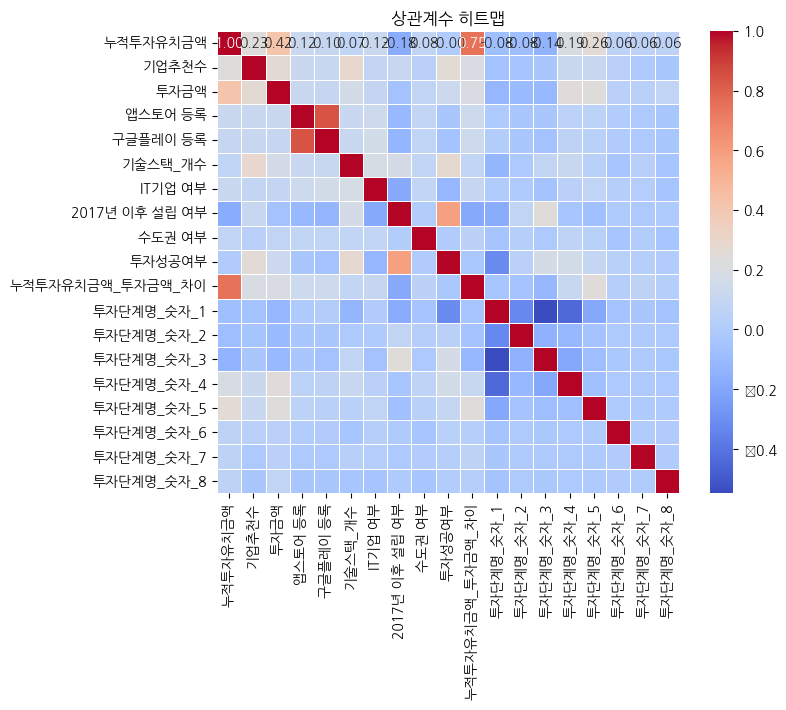

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'  # 사용할 한글 폰트명

corr_matrix = df.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True, annot_kws={"size": 10})
plt.title('상관계수 히트맵')
plt.show()


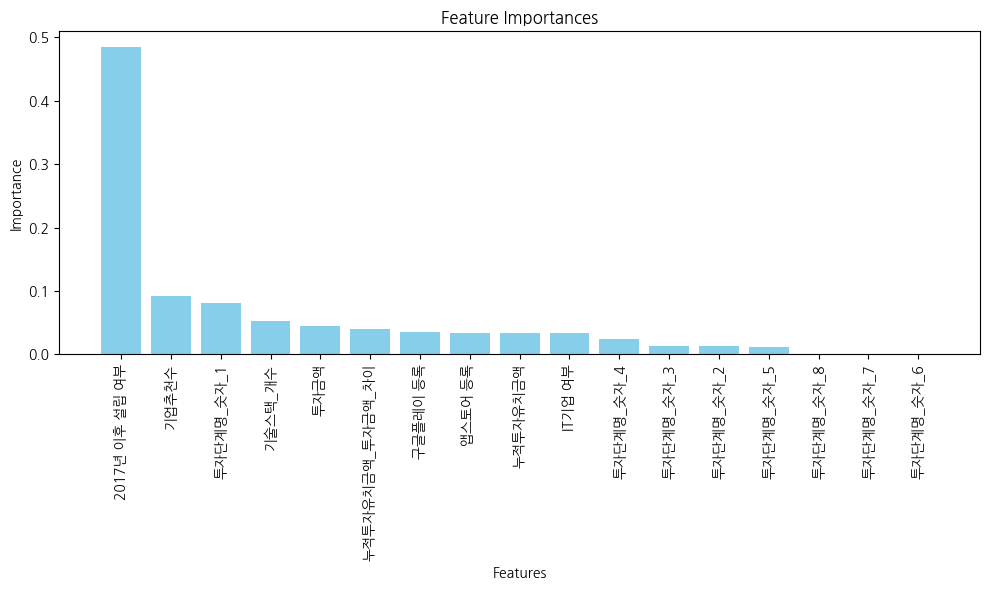

In [7]:
selected_features = ['누적투자유치금액', '기업추천수', '투자금액', '앱스토어 등록', '구글플레이 등록', '기술스택_개수', 'IT기업 여부', '2017년 이후 설립 여부', '누적투자유치금액_투자금액_차이', '투자단계명_숫자_1', '투자단계명_숫자_2', '투자단계명_숫자_3', '투자단계명_숫자_4','투자단계명_숫자_5', '투자단계명_숫자_6','투자단계명_숫자_7','투자단계명_숫자_8']
target = df['투자성공여부']

features = df[selected_features]

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(features, target)

importances = model_rf.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(features.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(features.shape[1]), [selected_features[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

## 1) Decision Tree

In [8]:
features = ['누적투자유치금액', '기업추천수', '투자금액', '앱스토어 등록', '구글플레이 등록', '기술스택_개수', 'IT기업 여부', '2017년 이후 설립 여부', '누적투자유치금액_투자금액_차이', '투자단계명_숫자_1', '투자단계명_숫자_2', '투자단계명_숫자_3', '투자단계명_숫자_4','투자단계명_숫자_5', '투자단계명_숫자_6','투자단계명_숫자_7','투자단계명_숫자_8']
target = '투자성공여부'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

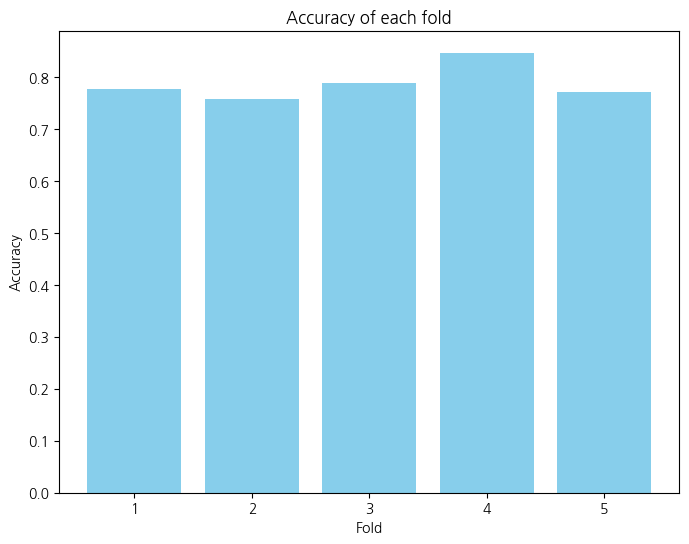

평균 정확도: 0.788006379585327


In [10]:
scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(scores)+1), scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy of each fold')
plt.show()

print("평균 정확도:", scores.mean())

In [11]:
dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, y_train)

scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)

print("Cross-validation scores:", scores)

print("Average accuracy:", scores.mean())

Cross-validation scores: [0.77619048 0.75238095 0.784689   0.84210526 0.77511962]
Average accuracy: 0.7860970608339028


In [12]:
dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, y_train)

print("Accuracy:", dt_classifier.score(X_test, y_test))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.816793893129771
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       109
           1       0.88      0.79      0.83       153

    accuracy                           0.81       262
   macro avg       0.81      0.82      0.81       262
weighted avg       0.82      0.81      0.81       262

Confusion Matrix:
[[ 92  17]
 [ 32 121]]


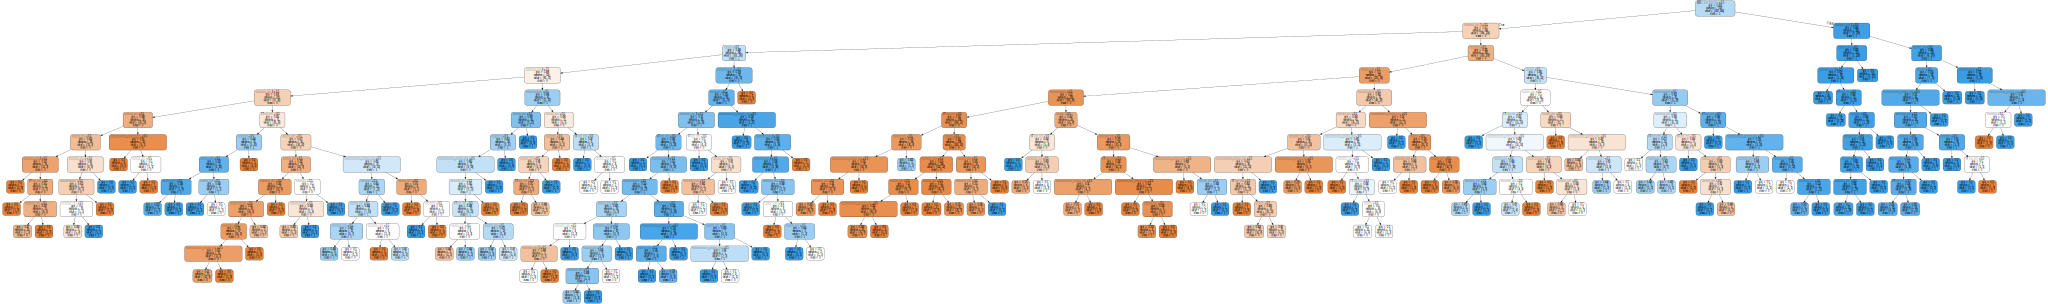

In [13]:
y_pred = dt_classifier.predict(X_test)

dt_classifier.fit(X_train, y_train)

export_graphviz(dt_classifier, out_file='tree.dot', 
                feature_names=X_train.columns,  
                class_names=['0', '1'],
                filled=True, rounded=True,
                special_characters=True)

with open("tree.dot", encoding="utf-8") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)

graph

## 2) RandomForest

In [14]:
selected_features = ['누적투자유치금액', '기업추천수', '투자금액', '앱스토어 등록', '구글플레이 등록', '기술스택_개수', 'IT기업 여부', '2017년 이후 설립 여부', '누적투자유치금액_투자금액_차이', '투자단계명_숫자_1', '투자단계명_숫자_2', '투자단계명_숫자_3', '투자단계명_숫자_4','투자단계명_숫자_5', '투자단계명_숫자_6','투자단계명_숫자_7','투자단계명_숫자_8']
target = '투자성공여부'

X = df[selected_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
Ft_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
Ft_classifier.fit(X_train, y_train)

y_pred = Ft_classifier.predict(X_test)

print("Accuracy:", Ft_classifier.score(X_test, y_test))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8091603053435115
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       109
           1       0.85      0.82      0.83       153

    accuracy                           0.81       262
   macro avg       0.80      0.81      0.80       262
weighted avg       0.81      0.81      0.81       262

Confusion Matrix:
[[ 86  23]
 [ 27 126]]


In [16]:
class_weights = {0: 0.7, 1: 0.3}
best_classifier = RandomForestClassifier(n_estimators=200, max_depth=None, max_features='sqrt', min_samples_leaf=4, min_samples_split=5, random_state=0, class_weight=class_weights)

best_classifier.fit(X_train, y_train)

y_pred = best_classifier.predict(X_test)

print("Accuracy:", best_classifier.score(X_test, y_test))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7977099236641222
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       109
           1       0.91      0.73      0.81       153

    accuracy                           0.80       262
   macro avg       0.80      0.81      0.80       262
weighted avg       0.82      0.80      0.80       262

Confusion Matrix:
[[ 98  11]
 [ 42 111]]


In [17]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [18]:
X_train_pca = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
X_test_pca = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])

class_weights = {0: 0.7, 1: 0.3}
best_classifier = RandomForestClassifier(n_estimators=200, max_depth=None, max_features='sqrt', min_samples_leaf=4, min_samples_split=5, random_state=0, class_weight=class_weights)

best_classifier.fit(X_train_pca, y_train)

y_pred = best_classifier.predict(X_test_pca)

In [19]:
print("Accuracy:", best_classifier.score(X_test_pca, y_test))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7900763358778626
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       109
           1       0.88      0.74      0.80       153

    accuracy                           0.79       262
   macro avg       0.79      0.80      0.79       262
weighted avg       0.81      0.79      0.79       262

Confusion Matrix:
[[ 94  15]
 [ 40 113]]


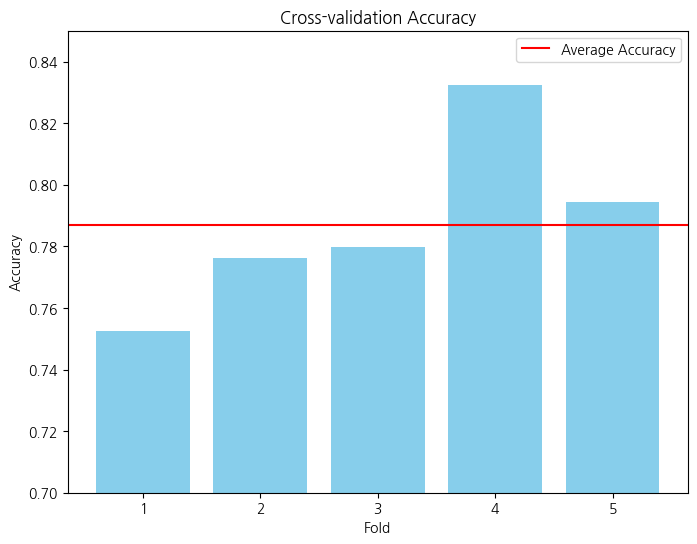

In [20]:
cross_val_scores = cross_val_score(best_classifier, X_train_pca, y_train, cv=5)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cross_val_scores) + 1), cross_val_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation Accuracy')
plt.ylim([0.7, 0.85])
plt.axhline(y=np.mean(cross_val_scores), color='r', linestyle='-', label='Average Accuracy')
plt.legend()
plt.show()

In [21]:
train_accuracy = Ft_classifier.score(X_train, y_train)
test_accuracy = Ft_classifier.score(X_test, y_test)

print("훈련 데이터 정확도:", train_accuracy)
print("테스트 데이터 정확도:", test_accuracy)

if train_accuracy > 0.8 and (train_accuracy - test_accuracy) > 0.05:
    print("모델이 과적합되었습니다.")
else:
    print("모델이 과적합되지 않았습니다.")


훈련 데이터 정확도: 0.8720152817574021
테스트 데이터 정확도: 0.8091603053435115
모델이 과적합되었습니다.


In [22]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=None, max_features='sqrt', min_samples_leaf=4, min_samples_split=5, random_state=0)

gb_classifier = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=0)

ensemble_classifier = VotingClassifier(estimators=[('rf', rf_classifier), ('gb', gb_classifier)], voting='soft')

ensemble_classifier.fit(X_train_pca, y_train)

y_pred = ensemble_classifier.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_pred)

print("테스트 데이터 정확도:", test_accuracy)


테스트 데이터 정확도: 0.7824427480916031


In [23]:
train_accuracy = ensemble_classifier.score(X_train_pca, y_train)
test_accuracy = ensemble_classifier.score(X_test_pca, y_test)

print("훈련 데이터 정확도:", train_accuracy)
print("테스트 데이터 정확도:", test_accuracy)

if train_accuracy > 0.8 and (train_accuracy - test_accuracy) > 0.05:
    print("모델이 과적합되었습니다.")
else:
    print("모델이 과적합되지 않았습니다.")

훈련 데이터 정확도: 0.8615090735434575
테스트 데이터 정확도: 0.7824427480916031
모델이 과적합되었습니다.


In [24]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       109
           1       0.88      0.80      0.84       153

    accuracy                           0.82       262
   macro avg       0.82      0.83      0.82       262
weighted avg       0.83      0.82      0.82       262

[[ 93  16]
 [ 31 122]]


C:\Users\sande\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\sande\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


NameError: name 'plot_decision_boundaries' is not defined

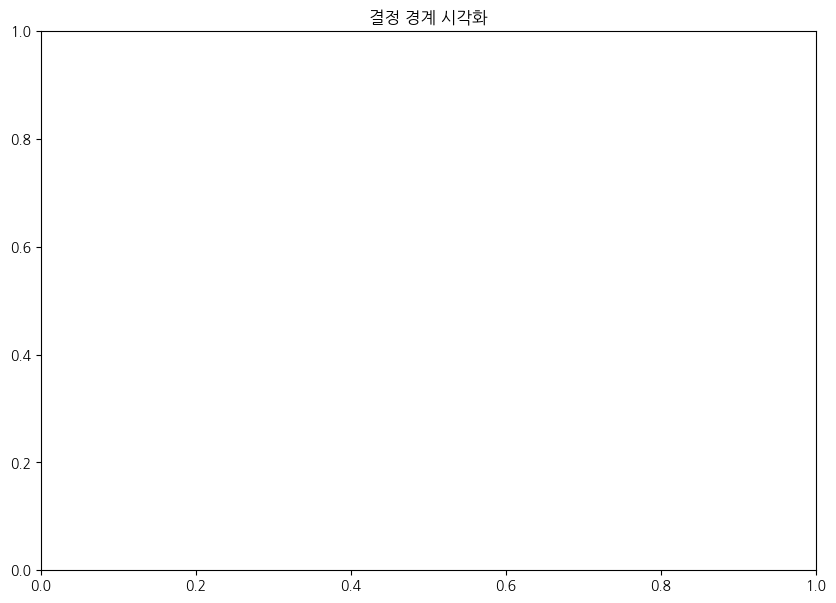

In [25]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

ensemble_classifier.fit(X_train_pca, y_train)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.set_title("결정 경계 시각화")
plot_decision_boundaries(X_train_pca, y_train.values, ensemble_classifier, ax)
plt.show()


## 3) Logistic Regression

In [ ]:
feature_logistics = ['누적투자유치금액', '기업추천수', '투자금액', '앱스토어 등록', '구글플레이 등록', '기술스택_개수', 'IT기업 여부', '2017년 이후 설립 여부', '누적투자유치금액_투자금액_차이', '투자단계명_숫자_1', '투자단계명_숫자_2', '투자단계명_숫자_3', '투자단계명_숫자_4','투자단계명_숫자_5', '투자단계명_숫자_6','투자단계명_숫자_7','투자단계명_숫자_8']
target_logistic = '투자성공여부'

X = df[feature_logistics]
y = df[target_logistic]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print("Train Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

accuracy_diff = train_accuracy - test_accuracy
print("Accuracy Difference:", accuracy_diff)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

X_train_processed = pipeline.fit_transform(X_train)

X_test_processed = pipeline.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_processed, y_train)

y_pred = model.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
train_accuracy = accuracy_score(y_train, model.predict(X_train_processed))
print("Train Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

accuracy_diff = train_accuracy - test_accuracy
print("Accuracy Difference:", accuracy_diff)

In [ ]:
cv_scores = cross_val_score(model, X_train_processed, y_train, cv=5)

mean_cv_accuracy = np.mean(cv_scores)
std_cv_accuracy = np.std(cv_scores)

print("Cross-Validation Mean Accuracy:", mean_cv_accuracy)
print("Cross-Validation Accuracy Standard Deviation:", std_cv_accuracy)


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test_processed)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("훈련 데이터 정확도: ", train_accuracy)
print("테스트 데이터 정확도: ", test_accuracy)

# 과적합 여부 판단
if train_accuracy > np.mean(cross_val_scores) and test_accuracy < np.mean(cross_val_scores):
    print("모델이 과적합되었습니다.")
else:
    print("모델이 과적합되지 않았습니다.")

## 모델 실제 적용 시뮬레이션

In [ ]:
simulation_df = pd.read_csv("기업정보.csv", encoding='cp949')

In [ ]:
columns_to_drop = ['업체국문명', '업체영문명', '기업한줄소개내용', '구성원수', '홈페이지url', '소셜미디어url', '기업추천내용', '발행사명', '보도일자', '뉴스제목명', '기사url']
simulation_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
simulation_service_df = pd.read_csv("서비스.csv", encoding='cp949')
simulation_invest_df = pd.read_csv("투자유치.csv", encoding='cp949')

In [ ]:
columns_to_drop = ['제품국문명', '제품일련번호', '한줄소개내용', '제품영문명', '제품상세설명', '검색태그내용']
simulation_service_df.drop(columns=columns_to_drop, inplace=True)
simulation_service_df.drop(columns='홈페이지url', inplace=True)

In [ ]:
columns_to_drop = ['투자일련번호', '투자일자', '기업가치금액', '투자유치비고', '보도자료발행사명', '보도자료제목', '보도자료url', '투자기관번호']
simulation_invest_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df_merged = pd.merge(simulation_df, simulation_service_df, on='기업일련번호', how='left')

In [ ]:
simulation_data = pd.merge(df_merged, simulation_invest_df, on='기업일련번호', how='left')

In [ ]:
simulation_data.drop(columns='기업소개상세내용', inplace=True)

In [ ]:
def convert_founding_date(date):
    if pd.isna(date):
        return 0
    date = pd.to_datetime(date, errors='coerce')
    return 1 if date and date.year >= 2017 else 0

simulation_data['설립일자'] = simulation_data['설립일자'].apply(convert_founding_date)

In [ ]:
simulation_data['누적투자금액_투자금액_차이'] = simulation_data['누적투자유치금액'] - simulation_data['투자금액']

In [ ]:
def convert_investment_difference(diff):
    if pd.isna(diff) or diff <= 0:
        return 0
    else:
        return 1

simulation_data['누적투자금액_투자금액_차이'] = simulation_data['누적투자금액_투자금액_차이'].apply(convert_investment_difference)

In [ ]:
mean_investment = df['누적투자유치금액'].mean()

def convert_investment(amount):
    if pd.isna(amount) or amount < mean_investment:
        return 0
    return 1

simulation_data['누적투자유치금액'] = simulation_data['누적투자유치금액'].apply(convert_investment)

In [ ]:
def convert_office_address(address):
    if pd.isna(address) or not isinstance(address, str):
        return 0
    return 1 if '경기' in address or '서울' in address else 0

simulation_data['사무실주소'] = simulation_data['사무실주소'].apply(convert_office_address)

In [ ]:
simulation_data['앱스토어url'] = simulation_data['앱스토어url'].apply(lambda x: 0 if pd.isna(x) else 1)
simulation_data['구글플레이url'] = simulation_data['구글플레이url'].apply(lambda x: 0 if pd.isna(x) else 1)

In [ ]:
invest_stage_rank = {
    'Seed': 2,
    'Angel': 3,
    'Series A': 4,
    'Series B': 5,
    'Series C': 6,
    'Series D': 7,
    'Pre-IPO': 8,
    '해당없음': 0,
    '투자 단계 비공개': 1,
    np.nan: 0
}

def convert_invest_stage(stage):
    return invest_stage_rank[stage]

simulation_data['투자단계명'] = simulation_data['투자단계명'].apply(convert_invest_stage)

In [ ]:
invest_stage_dummies = pd.get_dummies(simulation_data['투자단계명'], prefix='투자단계')

simulation_data = pd.concat([simulation_data, invest_stage_dummies], axis=1)

In [ ]:
def count_technologies(tech_stack):
    if pd.isna(tech_stack):
        return 0
    else:
        return len(tech_stack.split('||'))

simulation_data['기술스택_개수'] = simulation_data['기술스택명'].apply(count_technologies)

In [ ]:
mean_investment_amount = simulation_data['투자금액'].mean()

def convert_investment_amount(investment):
    if pd.isna(investment) or investment <= mean_investment_amount:
        return 0
    else:
        return 1

simulation_data['투자금액'] = simulation_data['투자금액'].apply(convert_investment_amount)

In [ ]:
def is_IT_company(industry):
    if pd.isna(industry):
        return 0
    elif ('소프트웨어' in industry or '데이터' in industry or '인공지능' in industry or 'Clud' in industry or '서버' in industry or '웹' in industry or '모바일' in industry or 'AI' in industry or 'AR' in industry or 'Unity' in industry or 'c#' in industry or '솔루션' in industry or 'mobile' in industry or 'platform' in industry or 'IT'):
        return 1
    else:
        return 0

simulation_data['IT기업여부'] = simulation_data['산업구분명'].apply(is_IT_company)

In [ ]:
simulation_data.drop(columns='산업구분명', inplace=True)
simulation_data.drop(columns='투자단계명', inplace=True)
simulation_data.drop(columns='기술스택명', inplace=True)

In [ ]:
simulation_data.rename(columns={'설립일자': '2017년 이후 설립 여부',
                               '사무실주소': '수도권 여부',
                               '앱스토어url': '앱스토어 등록',
                               '구글플레이url': '구글플레이 등록',
                               '투자단계': '투자단계명_숫자'}, inplace=True)

In [ ]:
simulation_data.drop(columns='기업일련번호', inplace=True)

In [ ]:
simulation_data.rename(columns={
    '2017년 이후 설립 여부': '2017년 이후 설립 여부',
    '누적투자유치금액': '누적투자유치금액',
    '기업추천수': '기업추천수',
    '수도권 여부': '수도권 여부',
    '앱스토어 등록': '앱스토어 등록',
    '구글플레이 등록': '구글플레이 등록',
    '투자금액': '투자금액',
    '누적투자금액_투자금액_차이': '누적투자유치금액_투자금액_차이',
    '투자단계_1': '투자단계명_숫자_1',
    '투자단계_2': '투자단계명_숫자_2',
    '투자단계_3': '투자단계명_숫자_3',
    '투자단계_4': '투자단계명_숫자_4',
    '투자단계_5': '투자단계명_숫자_5',
    '투자단계_6': '투자단계명_숫자_6',
    '투자단계_7': '투자단계명_숫자_7',
    '투자단계_8': '투자단계명_숫자_8',
    'IT기업여부': 'IT기업 여부'
}, inplace=True)

In [ ]:
simulation_data.drop(columns=['수도권 여부'], inplace=True)

X_sim = simulation_data[['누적투자유치금액', '기업추천수', '투자금액', '앱스토어 등록', '구글플레이 등록',
                         '기술스택_개수', 'IT기업 여부', '2017년 이후 설립 여부',
                         '누적투자유치금액_투자금액_차이', '투자단계명_숫자_1', '투자단계명_숫자_2',
                         '투자단계명_숫자_3', '투자단계명_숫자_4', '투자단계명_숫자_5',
                         '투자단계명_숫자_6', '투자단계명_숫자_7', '투자단계명_숫자_8']]

In [ ]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_resampled, y_train_resampled)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_resampled, y_train_resampled)

y_pred_sim = rf_classifier.predict(X_sim)

In [ ]:
print(y_pred_sim[:200])

In [ ]:
import numpy as np

for i in range(5):
    print(f"테스트 {i+1}")

    np.random.seed(i)

    random_indices = np.random.choice(len(y_pred_sim), size=5000, replace=False)

    selected_predictions = y_pred_sim[random_indices]

    success_count = np.count_nonzero(selected_predictions == 1)
    failure_count = np.count_nonzero(selected_predictions == 0)

    print("투자 유치 성공: ", success_count)
    print("투자 유치 실패: ", failure_count)
    print()
